In [7]:
import pandas as pd

# Load the data
force_config1 = pd.read_csv('force_config1.csv')
force_config2 = pd.read_csv('force_config2.csv')
sound_config1 = pd.read_csv('sound_config1.csv')
sound_config2 = pd.read_csv('sound_config2.csv')
vibration_config1 = pd.read_csv('vibration_config1.csv')
vibration_config2 = pd.read_csv('vibration_config2.csv')
visuals_config1 = pd.read_csv('visuals_config1.csv')
visuals_config2 = pd.read_csv('visuals_config2.csv')

# Display the first few rows of each DataFrame to understand their structure
force_config1.head(), force_config2.head(), sound_config1.head(), sound_config2.head(), vibration_config1.head(), vibration_config2.head(), visuals_config1.head(), visuals_config2.head()


(            Start Time             End Time    Elapsed Time      End PSI  \
 0  2024-05-16 15:03:35  2024-05-16 15:03:50  0:00:15.002826  7363.725298   
 1  2024-05-16 15:24:04  2024-05-16 15:24:38  0:00:33.394993  6966.542751   
 2  2024-05-16 15:32:21  2024-05-16 15:32:31  0:00:09.261530  7025.239679   
 3  2024-05-16 15:59:45  2024-05-16 16:00:11  0:00:25.893659  6999.804344   
 4  2024-05-16 16:16:55  2024-05-16 16:17:07  0:00:12.245922  7243.983565   
 
   Extension %  
 0     100.00%  
 1     100.00%  
 2     100.00%  
 3     100.00%  
 4     100.00%  ,
             Start Time             End Time    Elapsed Time      End PSI  \
 0  2024-05-16 15:04:06  2024-05-16 15:04:19  0:00:12.934045  7186.460575   
 1  2024-05-16 15:23:08  2024-05-16 15:23:51  0:00:42.899924  7036.979065   
 2  2024-05-16 15:32:46  2024-05-16 15:33:13  0:00:27.229773  8207.004500   
 3  2024-05-16 16:00:23  2024-05-16 16:01:24  0:01:00.774293  7016.239483   
 4  2024-05-16 16:17:22  2024-05-16 16:17:34  0:

In [8]:
import matplotlib.pyplot as plt

# Define the analysis function
def analyze_overshoot(data, threshold=7000):
    overshoots = data[data['End PSI'] > threshold]['End PSI']
    frequency = len(overshoots)
    max_overshoot = overshoots.max() if not overshoots.empty else None
    std_dev = overshoots.std() if not overshoots.empty else None
    return frequency, max_overshoot, std_dev, overshoots

# Analyze overshoots for each configuration
force_config1_analysis = analyze_overshoot(force_config1)
force_config2_analysis = analyze_overshoot(force_config2)
sound_config1_analysis = analyze_overshoot(sound_config1)
sound_config2_analysis = analyze_overshoot(sound_config2)
vibration_config1_analysis = analyze_overshoot(vibration_config1)
vibration_config2_analysis = analyze_overshoot(vibration_config2)
visuals_config1_analysis = analyze_overshoot(visuals_config1)
visuals_config2_analysis = analyze_overshoot(visuals_config2)

# Display the analysis results
(force_config1_analysis, force_config2_analysis, sound_config1_analysis, sound_config2_analysis, 
 vibration_config1_analysis, vibration_config2_analysis, visuals_config1_analysis, visuals_config2_analysis)


((4,
  7363.725298376064,
  153.70610862993695,
  0    7363.725298
  2    7025.239679
  4    7243.983565
  5    7084.719233
  Name: End PSI, dtype: float64),
 (6,
  8207.004500097846,
  448.48092953332326,
  0    7186.460575
  1    7036.979065
  2    8207.004500
  3    7016.239483
  6    7155.155547
  9    7277.636470
  Name: End PSI, dtype: float64),
 (3,
  7295.245548816292,
  142.71192862742652,
  0    7028.370182
  4    7295.245549
  8    7074.153786
  Name: End PSI, dtype: float64),
 (6,
  7789.473684210541,
  302.66015944837073,
  0    7084.719233
  1    7789.473684
  3    7024.848366
  5    7385.247505
  6    7143.416161
  7    7004.891411
  Name: End PSI, dtype: float64),
 (6,
  7214.243787908443,
  66.85371406408169,
  0    7098.415183
  2    7040.500880
  4    7161.807865
  6    7214.243788
  7    7160.242614
  8    7062.023087
  Name: End PSI, dtype: float64),
 (4,
  7633.339855214251,
  288.59900043643233,
  1    7020.543925
  2    7633.339855
  3    7022.109176
  4    7210

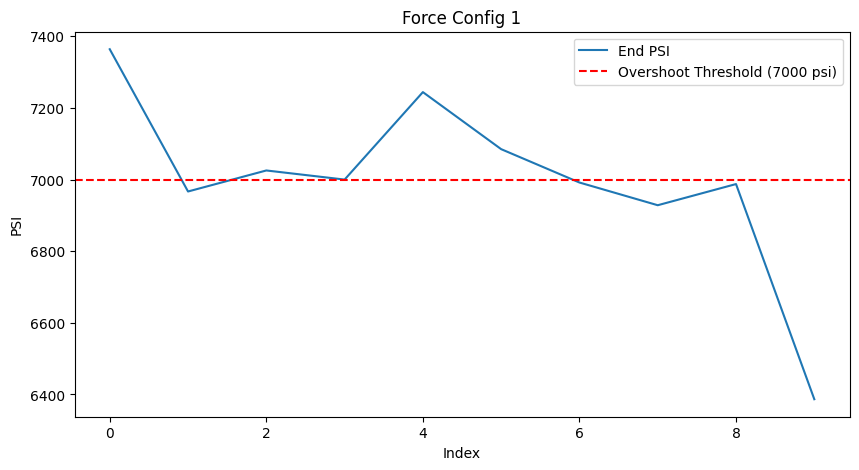

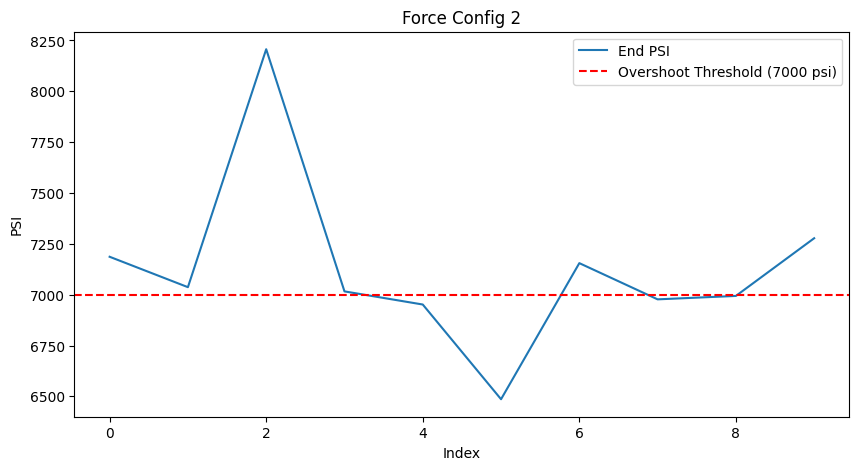

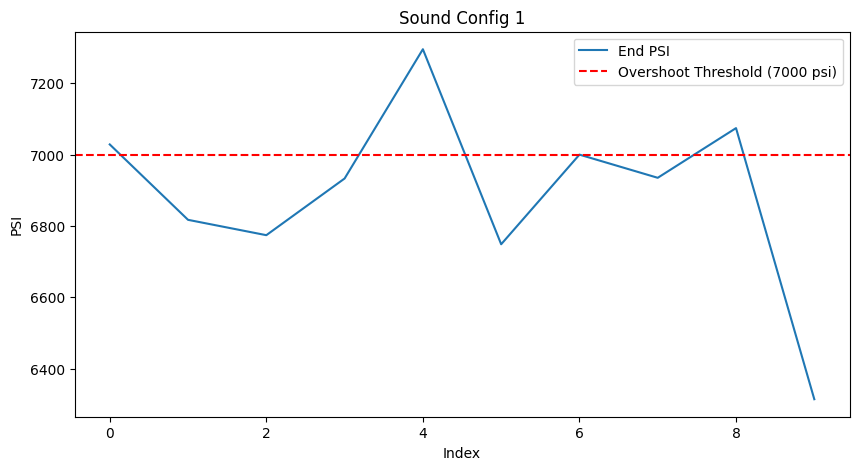

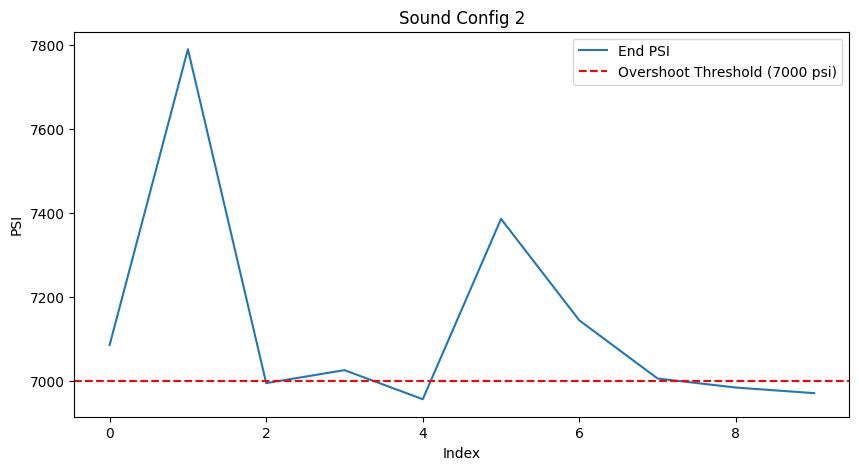

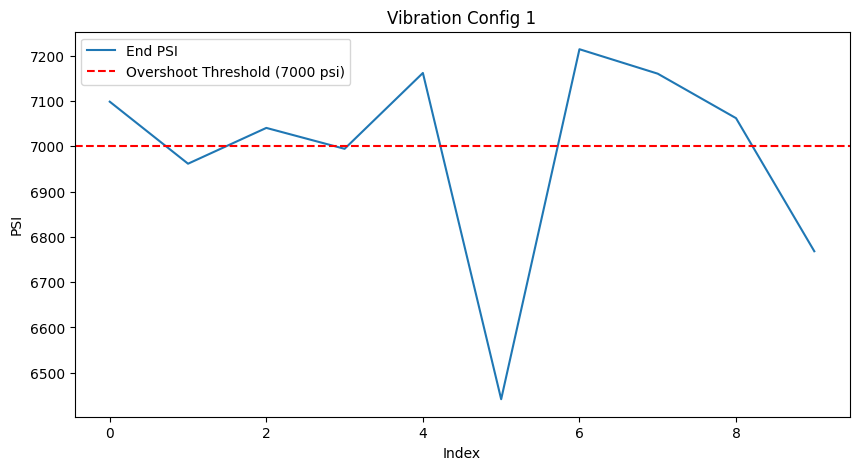

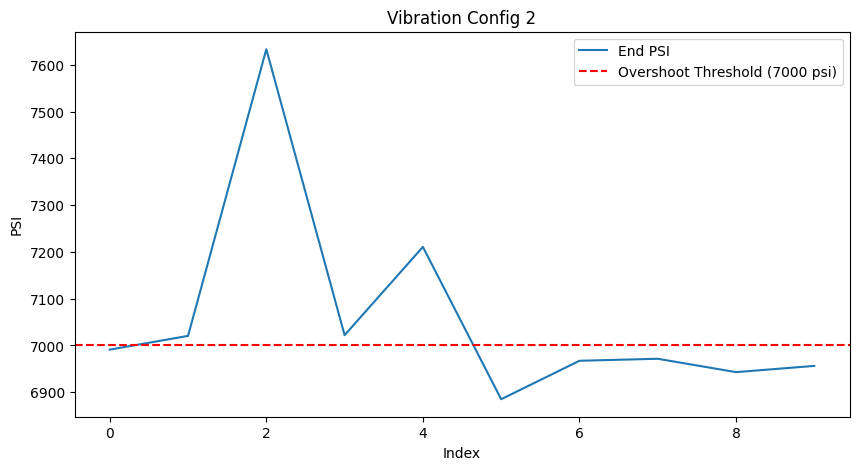

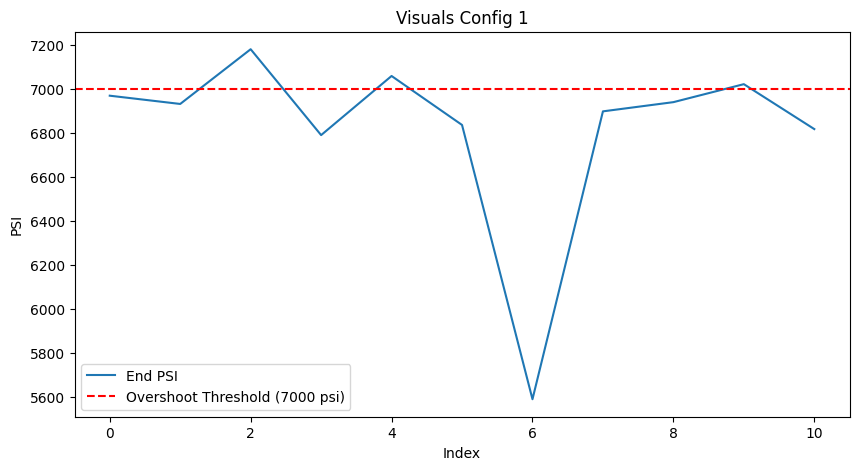

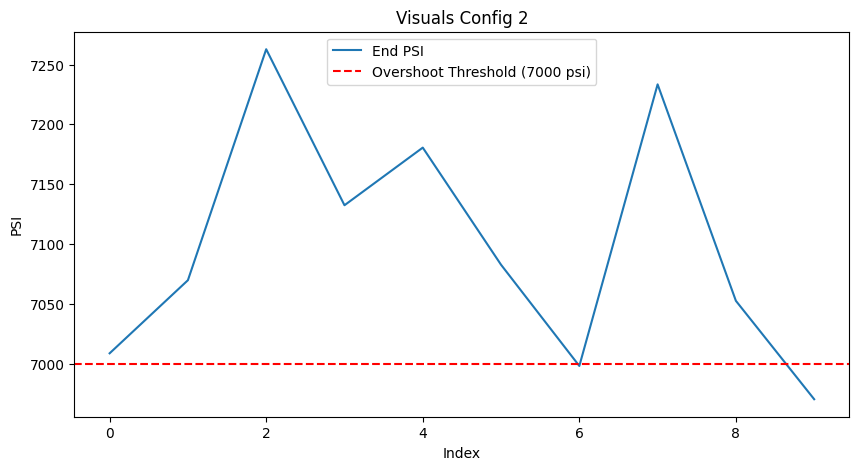

In [9]:
# Define the plotting function
def plot_psi(data, title, threshold=7000):
    plt.figure(figsize=(10, 5))
    plt.plot(data['End PSI'], label='End PSI')
    plt.axhline(y=threshold, color='r', linestyle='--', label=f'Overshoot Threshold ({threshold} psi)')
    plt.xlabel('Index')
    plt.ylabel('PSI')
    plt.title(title)
    plt.legend()
    plt.show()

# Plotting for each configuration
plot_psi(force_config1, 'Force Config 1')
plot_psi(force_config2, 'Force Config 2')
plot_psi(sound_config1, 'Sound Config 1')
plot_psi(sound_config2, 'Sound Config 2')
plot_psi(vibration_config1, 'Vibration Config 1')
plot_psi(vibration_config2, 'Vibration Config 2')
plot_psi(visuals_config1, 'Visuals Config 1')
plot_psi(visuals_config2, 'Visuals Config 2')


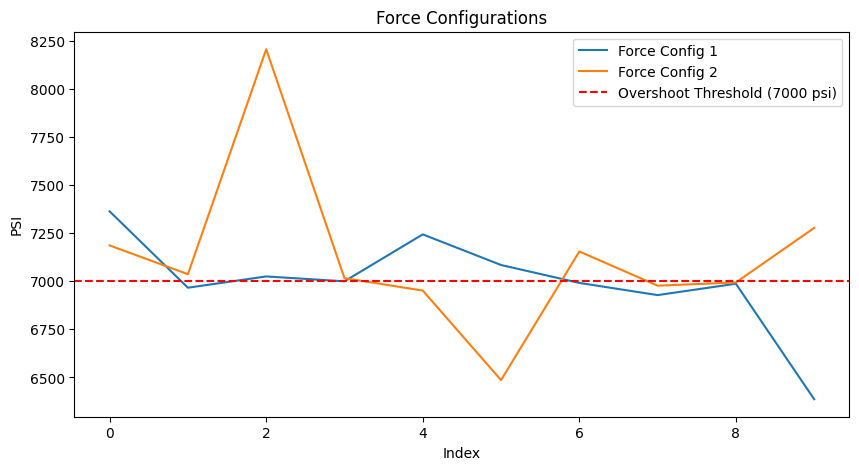

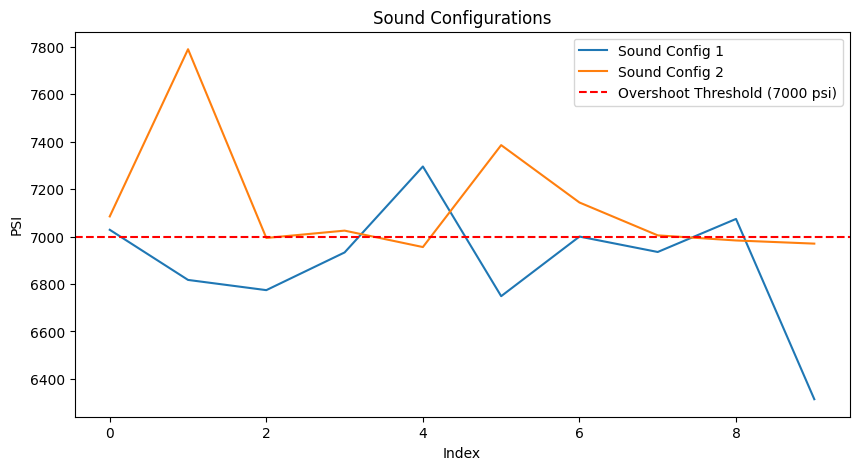

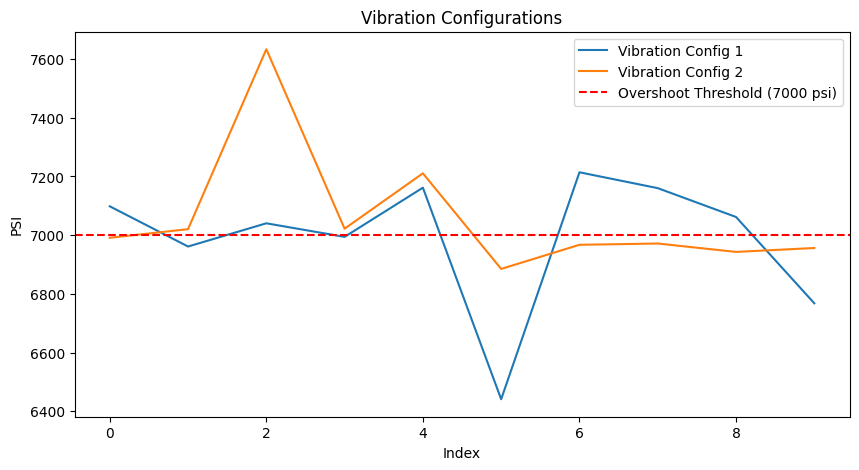

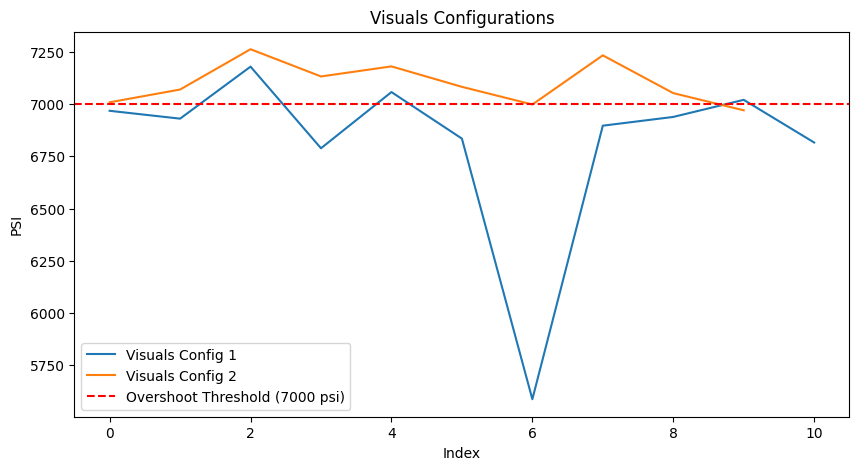

In [10]:
# Define the combined plotting function
def plot_combined_psi(data1, data2, title, label1, label2, threshold=7000):
    plt.figure(figsize=(10, 5))
    plt.plot(data1['End PSI'], label=label1)
    plt.plot(data2['End PSI'], label=label2)
    plt.axhline(y=threshold, color='r', linestyle='--', label=f'Overshoot Threshold ({threshold} psi)')
    plt.xlabel('Index')
    plt.ylabel('PSI')
    plt.title(title)
    plt.legend()
    plt.show()

# Plotting combined configurations
plot_combined_psi(force_config1, force_config2, 'Force Configurations', 'Force Config 1', 'Force Config 2')
plot_combined_psi(sound_config1, sound_config2, 'Sound Configurations', 'Sound Config 1', 'Sound Config 2')
plot_combined_psi(vibration_config1, vibration_config2, 'Vibration Configurations', 'Vibration Config 1', 'Vibration Config 2')
plot_combined_psi(visuals_config1, visuals_config2, 'Visuals Configurations', 'Visuals Config 1', 'Visuals Config 2')


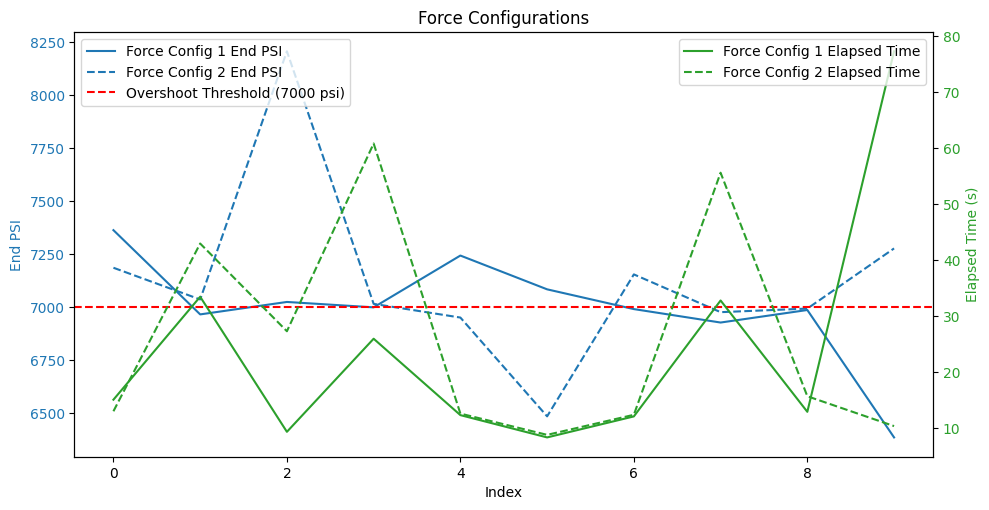

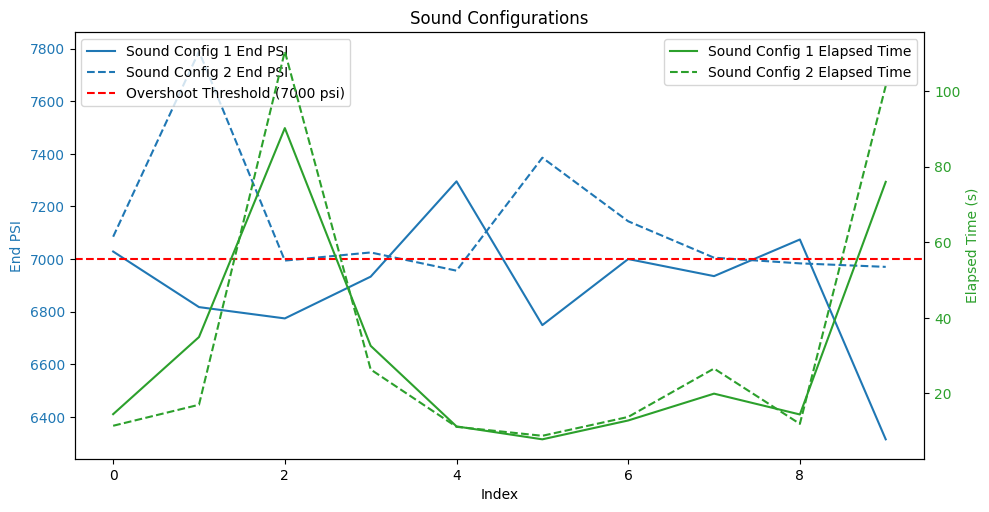

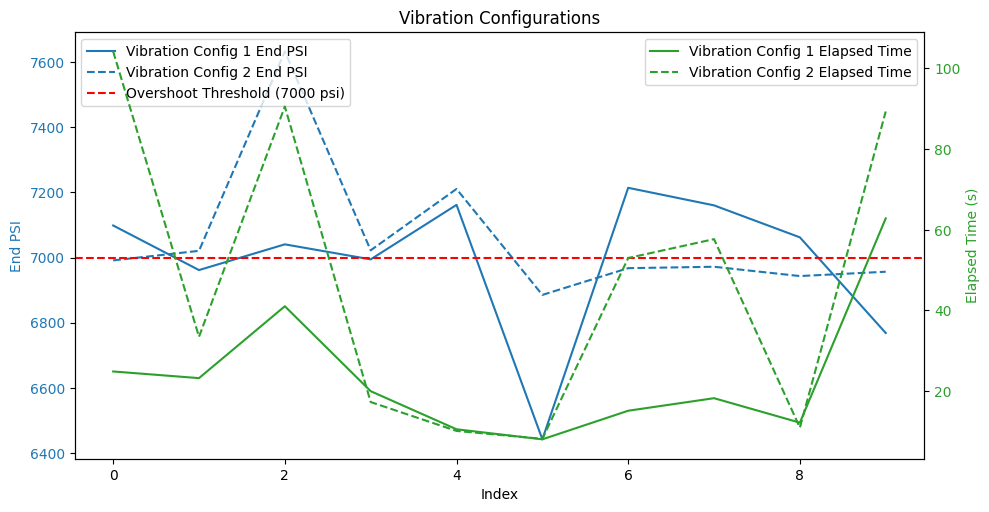

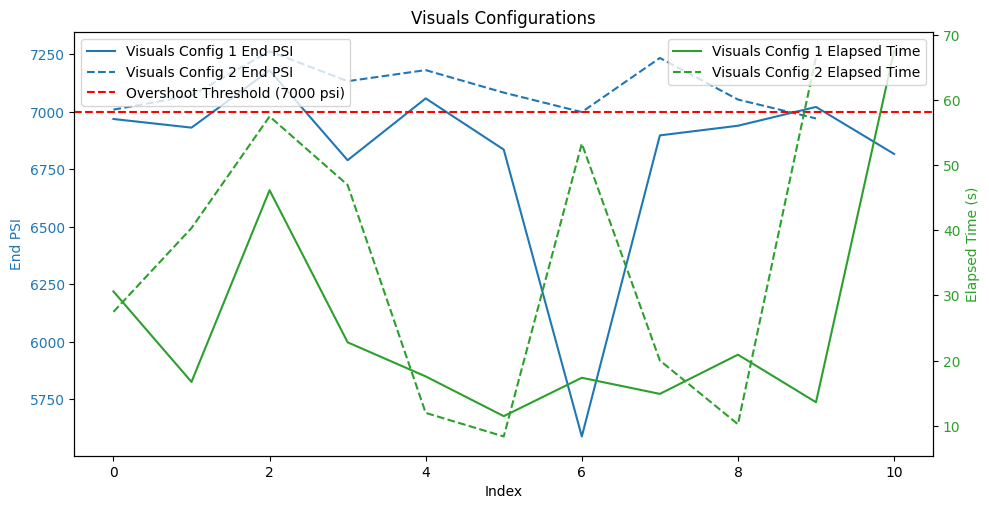

In [11]:
# Define the combined plotting function for both End PSI and Elapsed Time
def plot_combined(data1, data2, psi_title, time_title, label1, label2, psi_threshold=7000):
    fig, ax1 = plt.subplots(figsize=(10, 5))

    color = 'tab:blue'
    ax1.set_xlabel('Index')
    ax1.set_ylabel('End PSI', color=color)
    ax1.plot(data1['End PSI'], label=f'{label1} End PSI', color=color)
    ax1.plot(data2['End PSI'], label=f'{label2} End PSI', linestyle='--', color=color)
    ax1.axhline(y=psi_threshold, color='r', linestyle='--', label=f'Overshoot Threshold ({psi_threshold} psi)')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.legend(loc='upper left')

    ax2 = ax1.twinx()
    color = 'tab:green'
    ax2.set_ylabel('Elapsed Time (s)', color=color)
    ax2.plot(data1['Elapsed Time (s)'], label=f'{label1} Elapsed Time', color=color)
    ax2.plot(data2['Elapsed Time (s)'], label=f'{label2} Elapsed Time', linestyle='--', color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.legend(loc='upper right')

    fig.tight_layout()
    plt.title(psi_title)
    plt.show()

# Prepare data for elapsed time in seconds
force_config1['Elapsed Time (s)'] = pd.to_timedelta(force_config1['Elapsed Time']).dt.total_seconds()
force_config2['Elapsed Time (s)'] = pd.to_timedelta(force_config2['Elapsed Time']).dt.total_seconds()
sound_config1['Elapsed Time (s)'] = pd.to_timedelta(sound_config1['Elapsed Time']).dt.total_seconds()
sound_config2['Elapsed Time (s)'] = pd.to_timedelta(sound_config2['Elapsed Time']).dt.total_seconds()
vibration_config1['Elapsed Time (s)'] = pd.to_timedelta(vibration_config1['Elapsed Time']).dt.total_seconds()
vibration_config2['Elapsed Time (s)'] = pd.to_timedelta(vibration_config2['Elapsed Time']).dt.total_seconds()
visuals_config1['Elapsed Time (s)'] = pd.to_timedelta(visuals_config1['Elapsed Time']).dt.total_seconds()
visuals_config2['Elapsed Time (s)'] = pd.to_timedelta(visuals_config2['Elapsed Time']).dt.total_seconds()

# Plotting combined configurations for End PSI and Elapsed Time
plot_combined(force_config1, force_config2, 'Force Configurations', 'Force Configurations Time', 'Force Config 1', 'Force Config 2')
plot_combined(sound_config1, sound_config2, 'Sound Configurations', 'Sound Configurations Time', 'Sound Config 1', 'Sound Config 2')
plot_combined(vibration_config1, vibration_config2, 'Vibration Configurations', 'Vibration Configurations Time', 'Vibration Config 1', 'Vibration Config 2')
plot_combined(visuals_config1, visuals_config2, 'Visuals Configurations', 'Visuals Configurations Time', 'Visuals Config 1', 'Visuals Config 2')


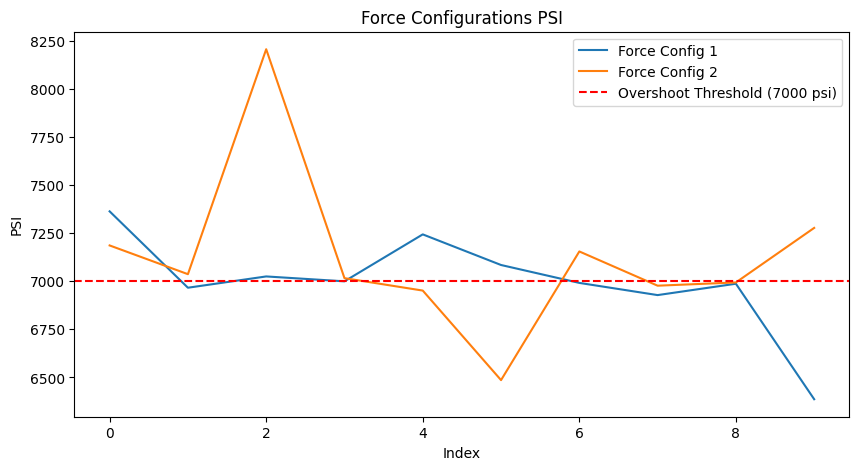

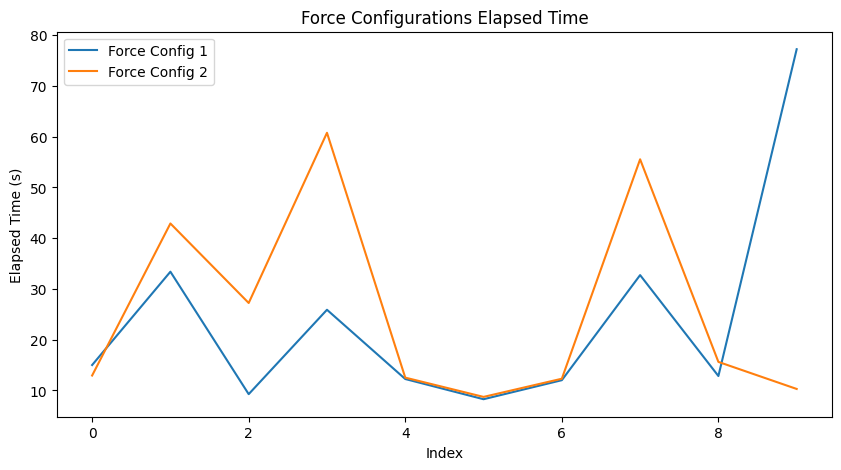

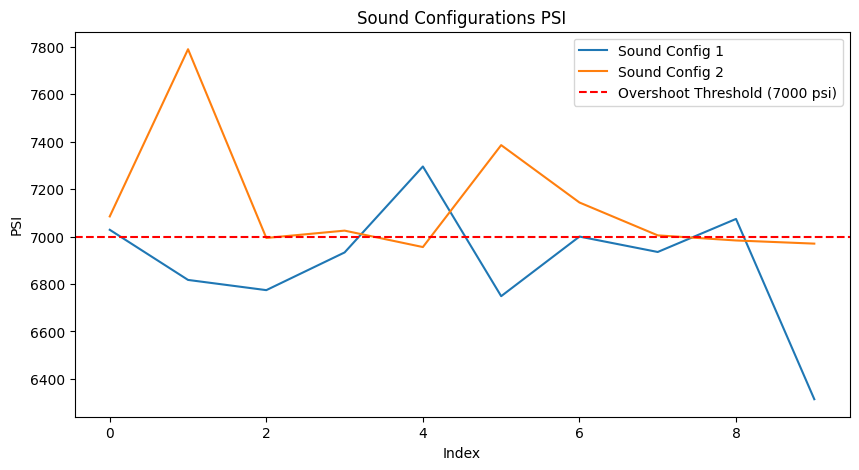

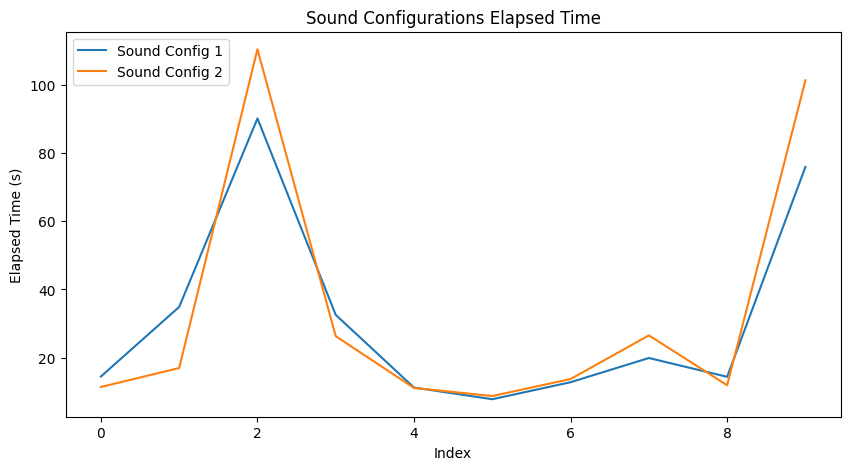

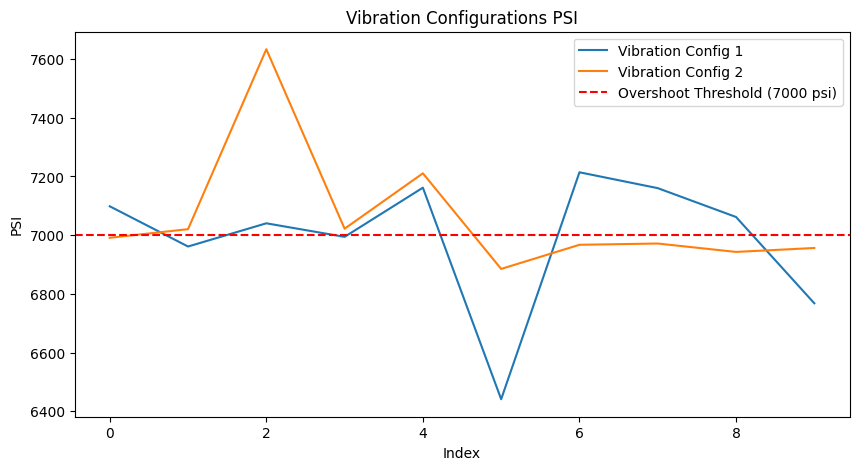

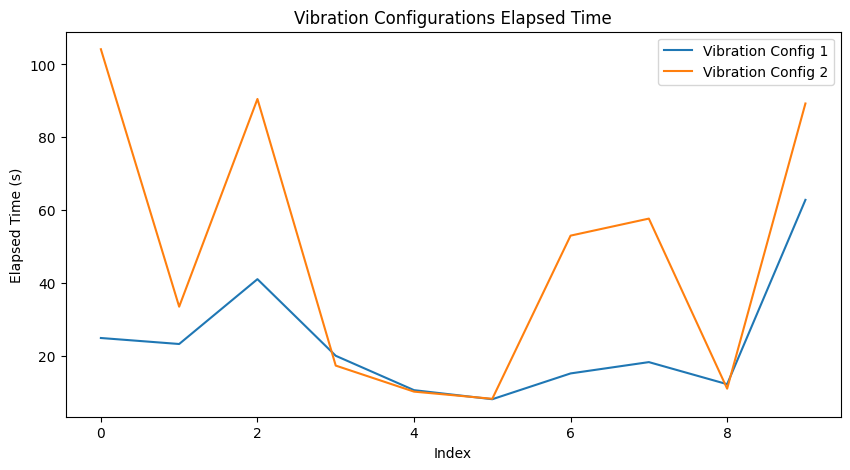

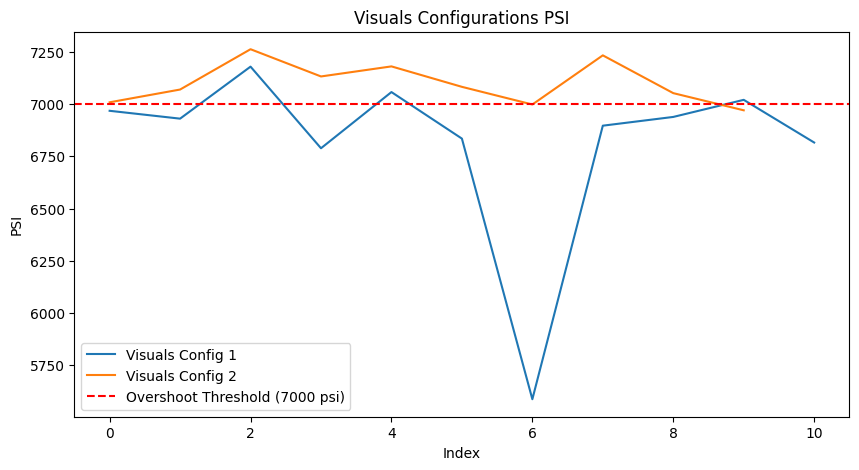

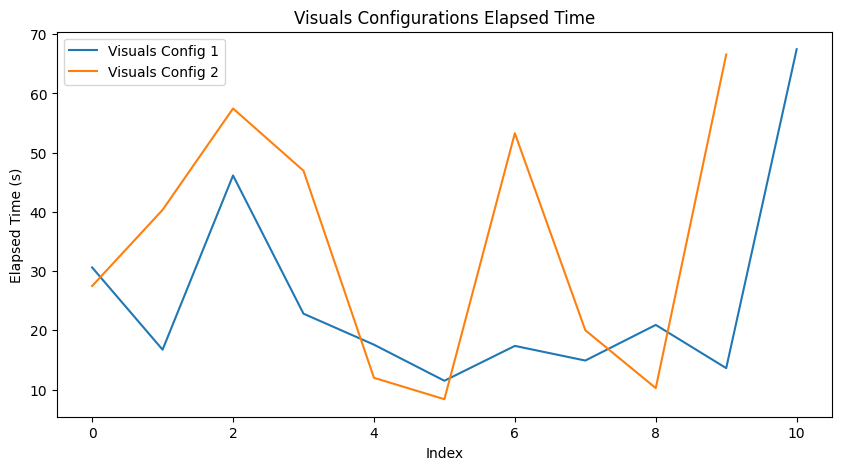

In [23]:
# Define the plotting function for combined End PSI and Elapsed Time separately
def plot_combined_psi(data1, data2, title, label1, label2, threshold=7000):
    plt.figure(figsize=(10, 5))
    plt.plot(data1['End PSI'], label=label1)
    plt.plot(data2['End PSI'], label=label2)
    plt.axhline(y=threshold, color='r', linestyle='--', label=f'Overshoot Threshold ({threshold} psi)')
    plt.xlabel('Index')
    plt.ylabel('PSI')
    plt.title(title)
    plt.legend()
    plt.show()

def plot_combined_time(data1, data2, title, label1, label2):
    plt.figure(figsize=(10, 5))
    plt.plot(data1['Elapsed Time (s)'], label=label1)
    plt.plot(data2['Elapsed Time (s)'], label=label2)
    plt.xlabel('Index')
    plt.ylabel('Elapsed Time (s)')
    plt.title(title)
    plt.legend()
    plt.show()

# Prepare data for elapsed time in seconds
force_config1['Elapsed Time (s)'] = pd.to_timedelta(force_config1['Elapsed Time']).dt.total_seconds()
force_config2['Elapsed Time (s)'] = pd.to_timedelta(force_config2['Elapsed Time']).dt.total_seconds()
sound_config1['Elapsed Time (s)'] = pd.to_timedelta(sound_config1['Elapsed Time']).dt.total_seconds()
sound_config2['Elapsed Time (s)'] = pd.to_timedelta(sound_config2['Elapsed Time']).dt.total_seconds()
vibration_config1['Elapsed Time (s)'] = pd.to_timedelta(vibration_config1['Elapsed Time']).dt.total_seconds()
vibration_config2['Elapsed Time (s)'] = pd.to_timedelta(vibration_config2['Elapsed Time']).dt.total_seconds()
visuals_config1['Elapsed Time (s)'] = pd.to_timedelta(visuals_config1['Elapsed Time']).dt.total_seconds()
visuals_config2['Elapsed Time (s)'] = pd.to_timedelta(visuals_config2['Elapsed Time']).dt.total_seconds()

# Plotting combined configurations for End PSI and Elapsed Time separately
plot_combined_psi(force_config1, force_config2, 'Force Configurations PSI', 'Force Config 1', 'Force Config 2')
plot_combined_time(force_config1, force_config2, 'Force Configurations Elapsed Time', 'Force Config 1', 'Force Config 2')

plot_combined_psi(sound_config1, sound_config2, 'Sound Configurations PSI', 'Sound Config 1', 'Sound Config 2')
plot_combined_time(sound_config1, sound_config2, 'Sound Configurations Elapsed Time', 'Sound Config 1', 'Sound Config 2')

plot_combined_psi(vibration_config1, vibration_config2, 'Vibration Configurations PSI', 'Vibration Config 1', 'Vibration Config 2')
plot_combined_time(vibration_config1, vibration_config2, 'Vibration Configurations Elapsed Time', 'Vibration Config 1', 'Vibration Config 2')

plot_combined_psi(visuals_config1, visuals_config2, 'Visuals Configurations PSI', 'Visuals Config 1', 'Visuals Config 2')
plot_combined_time(visuals_config1, visuals_config2, 'Visuals Configurations Elapsed Time', 'Visuals Config 1', 'Visuals Config 2')


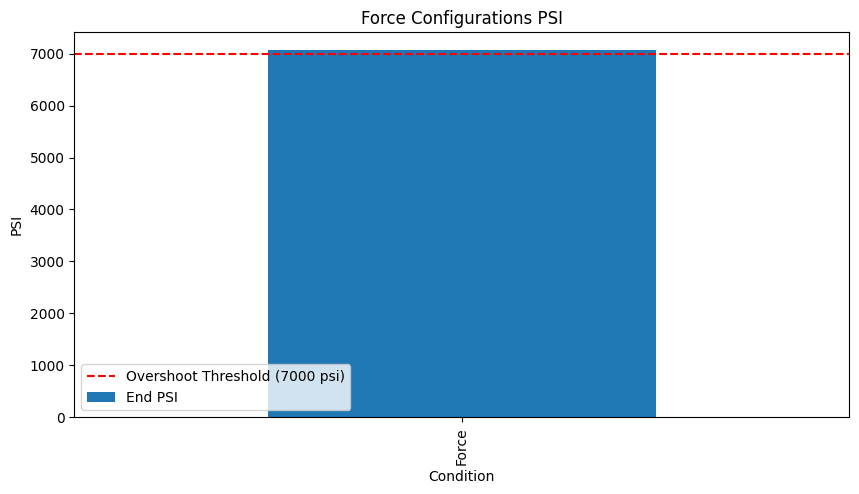

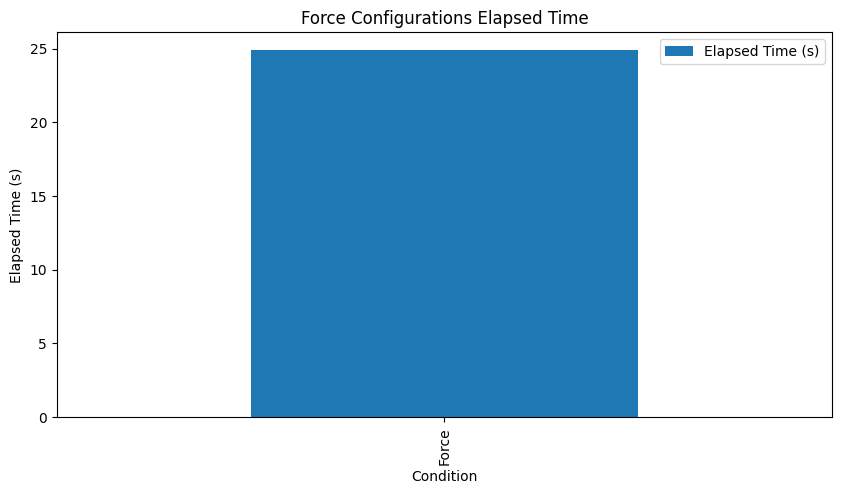

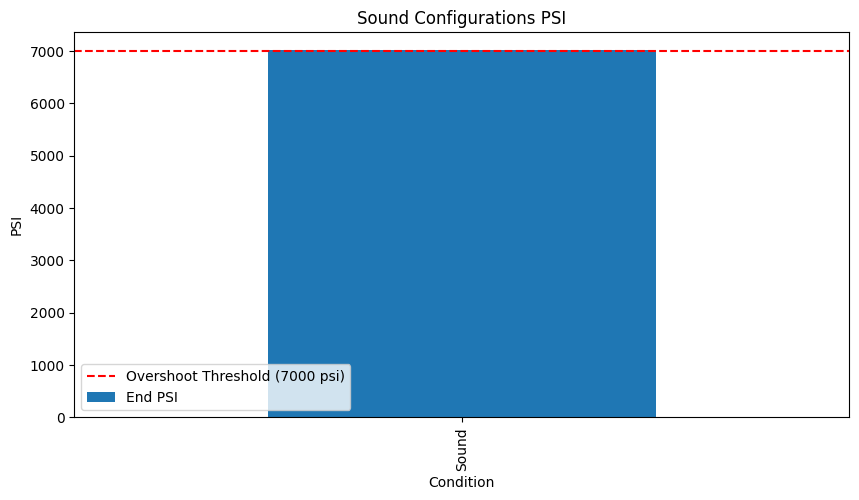

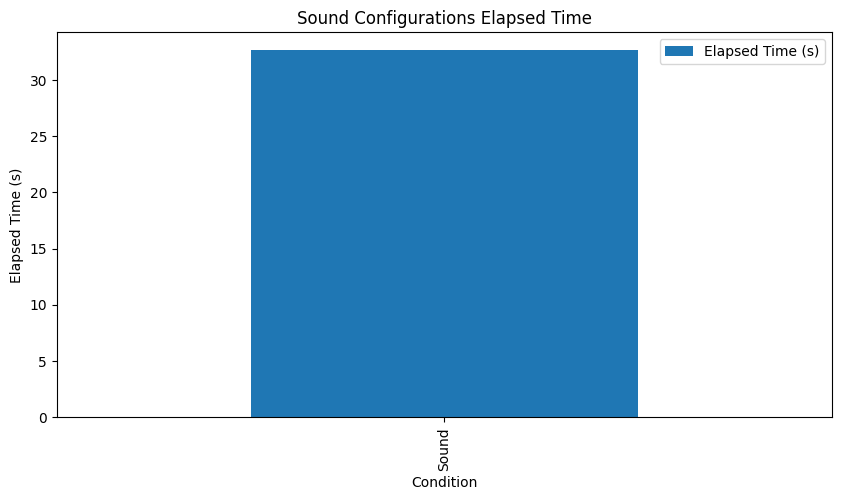

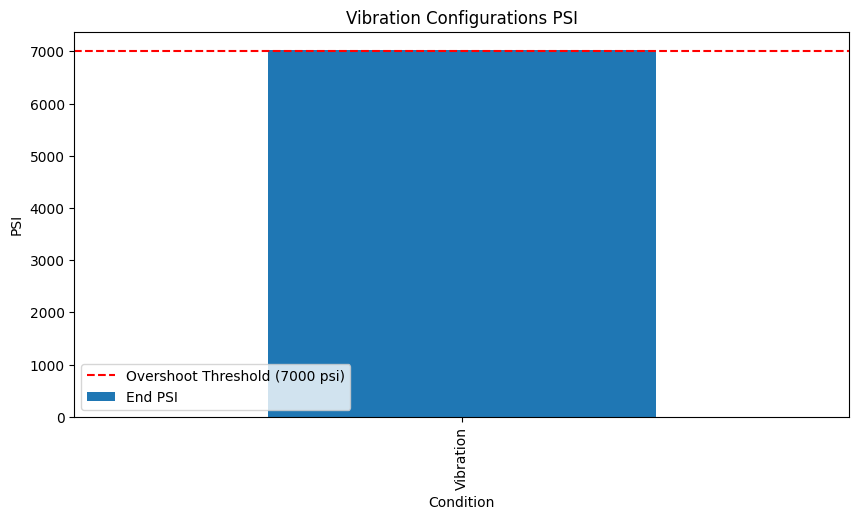

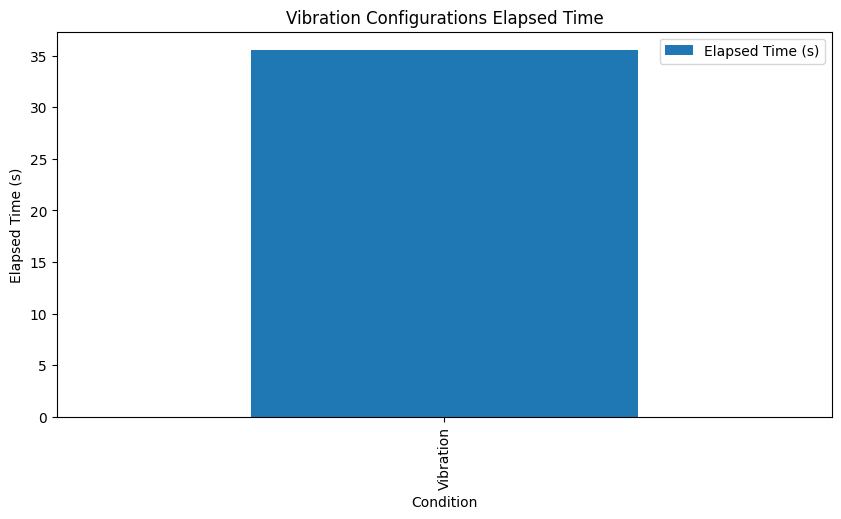

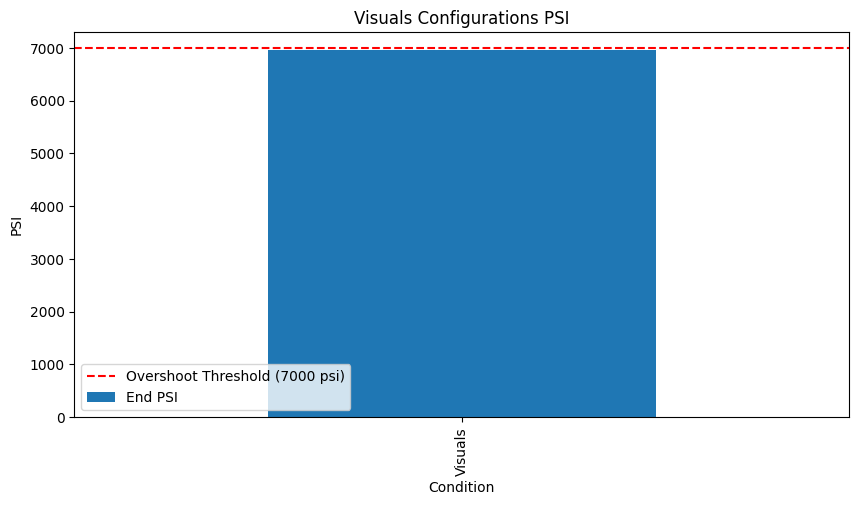

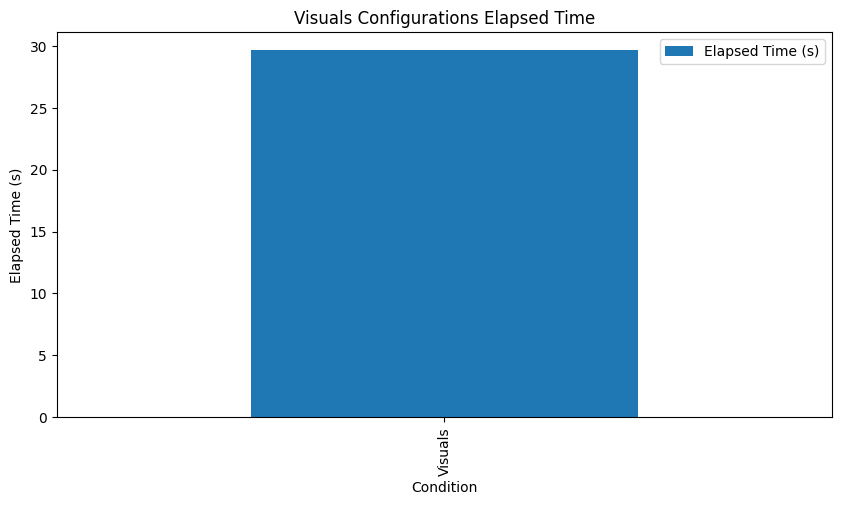

In [24]:
# Define the bar plotting function for End PSI
def plot_combined_psi_bars(data, title):
    data.groupby('Condition')['End PSI'].mean().plot(kind='bar', figsize=(10, 5))
    plt.axhline(y=7000, color='r', linestyle='--', label='Overshoot Threshold (7000 psi)')
    plt.xlabel('Condition')
    plt.ylabel('PSI')
    plt.title(title)
    plt.legend()
    plt.show()

# Define the bar plotting function for Elapsed Time
def plot_combined_time_bars(data, title):
    data.groupby('Condition')['Elapsed Time (s)'].mean().plot(kind='bar', figsize=(10, 5))
    plt.xlabel('Condition')
    plt.ylabel('Elapsed Time (s)')
    plt.title(title)
    plt.legend()
    plt.show()

# Plotting combined configurations for End PSI and Elapsed Time separately
plot_combined_psi_bars(combined_force, 'Force Configurations PSI')
plot_combined_time_bars(combined_force, 'Force Configurations Elapsed Time')

plot_combined_psi_bars(combined_sound, 'Sound Configurations PSI')
plot_combined_time_bars(combined_sound, 'Sound Configurations Elapsed Time')

plot_combined_psi_bars(combined_vibration, 'Vibration Configurations PSI')
plot_combined_time_bars(combined_vibration, 'Vibration Configurations Elapsed Time')

plot_combined_psi_bars(combined_visuals, 'Visuals Configurations PSI')
plot_combined_time_bars(combined_visuals, 'Visuals Configurations Elapsed Time')


In [13]:
# Append Config2 data to Config1 data for each condition
combined_force = pd.concat([force_config1, force_config2])
combined_sound = pd.concat([sound_config1, sound_config2])
combined_vibration = pd.concat([vibration_config1, vibration_config2])
combined_visuals = pd.concat([visuals_config1, visuals_config2])

# Add a condition column
combined_force['Condition'] = 'Force'
combined_sound['Condition'] = 'Sound'
combined_vibration['Condition'] = 'Vibration'
combined_visuals['Condition'] = 'Visuals'

# Combine all data into a single DataFrame
combined_data = pd.concat([combined_force, combined_sound, combined_vibration, combined_visuals])

# Convert Elapsed Time to total seconds
combined_data['Elapsed Time (s)'] = pd.to_timedelta(combined_data['Elapsed Time']).dt.total_seconds()

# Check the structure of the combined data
combined_data.head()


,Start Time,End Time,Elapsed Time,End PSI,Extension %,Elapsed Time (s),Condition
0,2024-05-16 15:03:35,2024-05-16 15:03:50,0:00:15.002826,7363.725298,100.00%,15.002826,Force
1,2024-05-16 15:24:04,2024-05-16 15:24:38,0:00:33.394993,6966.542751,100.00%,33.394993,Force
2,2024-05-16 15:32:21,2024-05-16 15:32:31,0:00:09.261530,7025.239679,100.00%,9.261530,Force
3,2024-05-16 15:59:45,2024-05-16 16:00:11,0:00:25.893659,6999.804344,100.00%,25.893659,Force
4,2024-05-16 16:16:55,2024-05-16 16:17:07,0:00:12.245922,7243.983565,100.00%,12.245922,Force


In [21]:
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Calculate descriptive statistics for End PSI
descriptive_stats_psi = combined_data.groupby('Condition')['End PSI'].agg([np.mean, np.std, 'count']).reset_index()

# Perform ANOVA for End PSI
model_psi = ols('Q("End PSI") ~ C(Condition)', data=combined_data).fit()
anova_table_psi = sm.stats.anova_lm(model_psi, typ=2)

# Perform Tukey's HSD post-hoc test for End PSI
tukey_result_psi = pairwise_tukeyhsd(combined_data['End PSI'], combined_data['Condition'])

# Calculate descriptive statistics for Elapsed Time
descriptive_stats_time = combined_data.groupby('Condition')['Elapsed Time (s)'].agg([np.mean, np.std, 'count']).reset_index()

# Perform ANOVA for Elapsed Time
model_time = ols('Q("Elapsed Time (s)") ~ C(Condition)', data=combined_data).fit()
anova_table_time = sm.stats.anova_lm(model_time, typ=2)

# Perform Tukey's HSD post-hoc test for Elapsed Time
tukey_result_time = pairwise_tukeyhsd(combined_data['Elapsed Time (s)'], combined_data['Condition'])

descriptive_stats_psi, anova_table_psi, tukey_result_psi.summary(), descriptive_stats_time, anova_table_time, tukey_result_time.summary()


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_123311/4171541779.py:7: FutureWarning: The provided callable <function mean at 0x7ddb790f1f30> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  descriptive_stats_psi = combined_data.groupby('Condition')['End PSI'].agg([np.mean, np.std, 'count']).reset_index()
/tmp/ipykernel_123311/4171541779.py:7: FutureWarning: The provided callable <function std at 0x7ddb790f2050> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  descriptive_stats_psi = combined_data.groupby('Condition')['End PSI'].agg([np.

(   Condition         mean         std  count
 0      Force  7063.294854  352.715452     20
 1      Sound  7012.737233  282.867429     20
 2  Vibration  7025.200548  221.746399     20
 3    Visuals  6952.958605  338.987985     21,
                     sum_sq    df         F    PR(>F)
 C(Condition)  1.292710e+05   3.0  0.466232  0.706688
 Residual      7.116536e+06  77.0       NaN       NaN,
 <class 'statsmodels.iolib.table.SimpleTable'>,
    Condition       mean        std  count
 0      Force  24.885863  19.918456     20
 1      Sound  32.630135  33.157732     20
 2  Vibration  35.552707  30.495102     20
 3    Visuals  29.639705  19.291253     21,
                     sum_sq    df         F    PR(>F)
 C(Condition)   1245.073051   3.0  0.596884  0.618956
 Residual      53539.544602  77.0       NaN       NaN,
 <class 'statsmodels.iolib.table.SimpleTable'>)

/tmp/ipykernel_123311/2309543256.py:44: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(x='Condition', y=y, hue='Configuration', data=data, jitter=True, color='black', alpha=0.5, dodge=True)


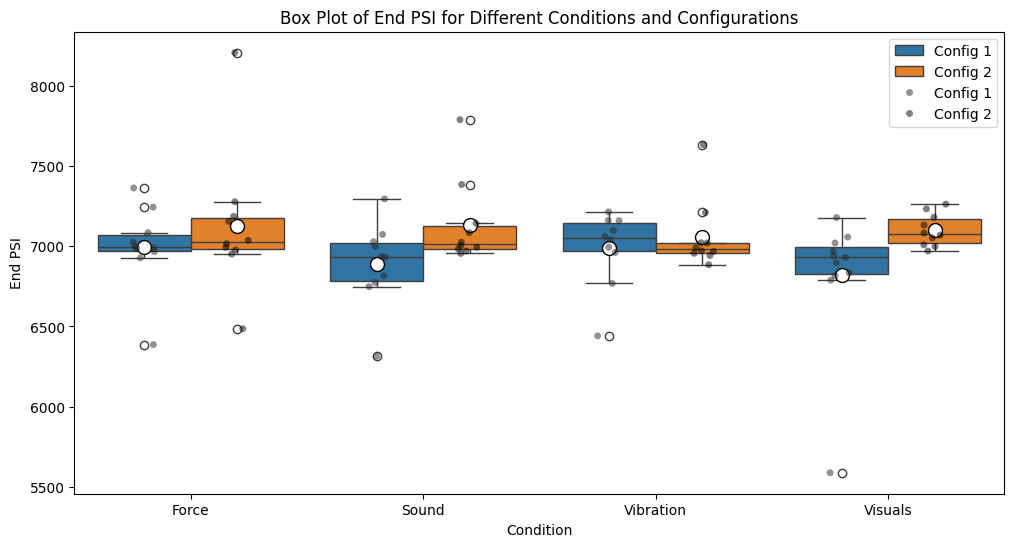

/tmp/ipykernel_123311/2309543256.py:44: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(x='Condition', y=y, hue='Configuration', data=data, jitter=True, color='black', alpha=0.5, dodge=True)


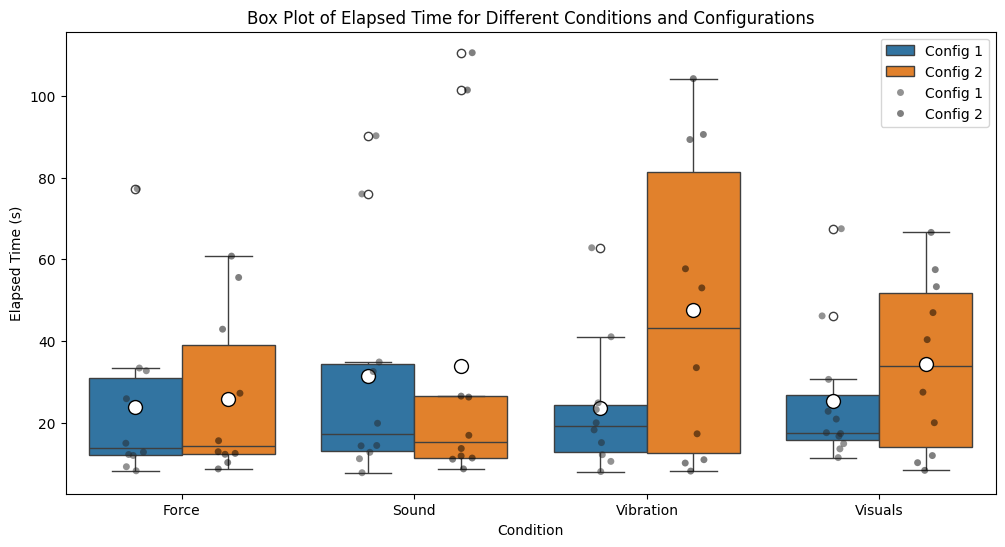

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for elapsed time in seconds
force_config1['Elapsed Time (s)'] = pd.to_timedelta(force_config1['Elapsed Time']).dt.total_seconds()
force_config2['Elapsed Time (s)'] = pd.to_timedelta(force_config2['Elapsed Time']).dt.total_seconds()
sound_config1['Elapsed Time (s)'] = pd.to_timedelta(sound_config1['Elapsed Time']).dt.total_seconds()
sound_config2['Elapsed Time (s)'] = pd.to_timedelta(sound_config2['Elapsed Time']).dt.total_seconds()
vibration_config1['Elapsed Time (s)'] = pd.to_timedelta(vibration_config1['Elapsed Time']).dt.total_seconds()
vibration_config2['Elapsed Time (s)'] = pd.to_timedelta(vibration_config2['Elapsed Time']).dt.total_seconds()
visuals_config1['Elapsed Time (s)'] = pd.to_timedelta(visuals_config1['Elapsed Time']).dt.total_seconds()
visuals_config2['Elapsed Time (s)'] = pd.to_timedelta(visuals_config2['Elapsed Time']).dt.total_seconds()

# Add a configuration label to each DataFrame
force_config1['Configuration'] = 'Config 1'
force_config2['Configuration'] = 'Config 2'
sound_config1['Configuration'] = 'Config 1'
sound_config2['Configuration'] = 'Config 2'
vibration_config1['Configuration'] = 'Config 1'
vibration_config2['Configuration'] = 'Config 2'
visuals_config1['Configuration'] = 'Config 1'
visuals_config2['Configuration'] = 'Config 2'

# Add a condition column
force_config1['Condition'] = 'Force'
force_config2['Condition'] = 'Force'
sound_config1['Condition'] = 'Sound'
sound_config2['Condition'] = 'Sound'
vibration_config1['Condition'] = 'Vibration'
vibration_config2['Condition'] = 'Vibration'
visuals_config1['Condition'] = 'Visuals'
visuals_config2['Condition'] = 'Visuals'

# Combine all data into a single DataFrame
combined_data = pd.concat([force_config1, force_config2, sound_config1, sound_config2, vibration_config1, vibration_config2, visuals_config1, visuals_config2])

# Function to create box plots with means and standard deviation
def plot_box(data, y, title):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Condition', y=y, hue='Configuration', data=data, showmeans=True,
                meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black",
                           "markersize":"10"})
    sns.stripplot(x='Condition', y=y, hue='Configuration', data=data, jitter=True, color='black', alpha=0.5, dodge=True)
    plt.title(title)
    plt.legend(loc='upper right')
    plt.show()

# Plotting combined configurations for End PSI and Elapsed Time separately
plot_box(combined_data, 'End PSI', 'Box Plot of End PSI for Different Conditions and Configurations')
plot_box(combined_data, 'Elapsed Time (s)', 'Box Plot of Elapsed Time for Different Conditions and Configurations')


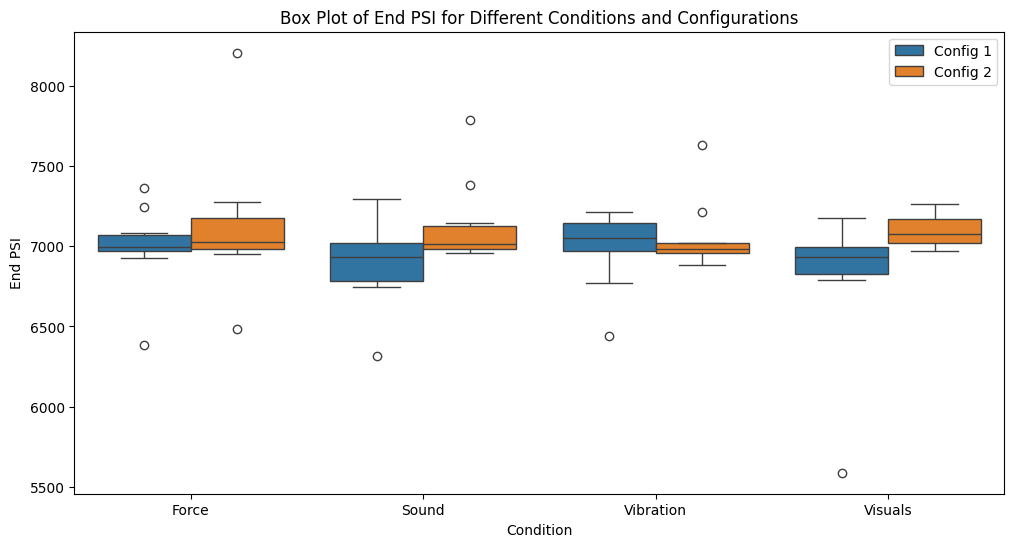

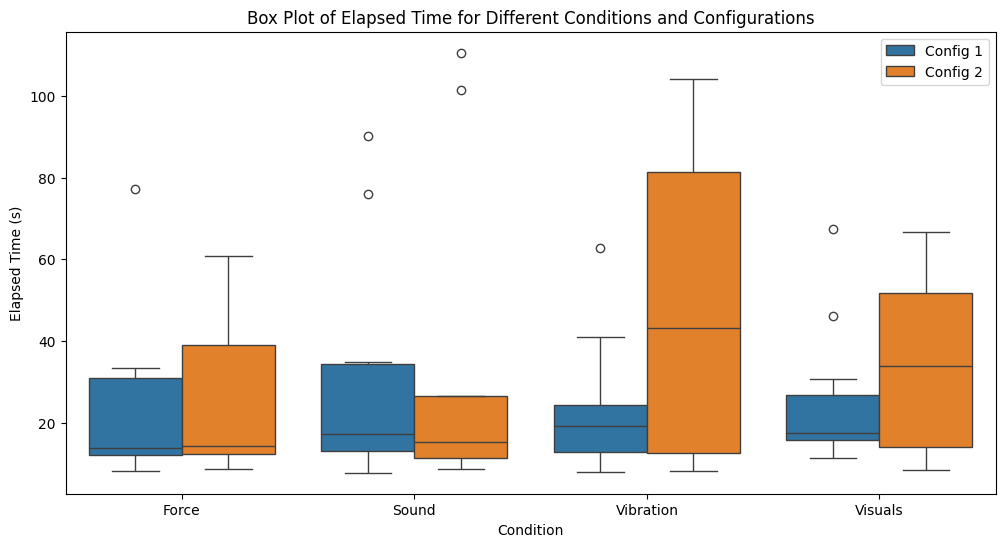

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to create box plots without mean markers
def plot_box_without_means(data, y, title):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Condition', y=y, hue='Configuration', data=data, showmeans=False)
    plt.title(title)
    plt.legend(loc='upper right')
    plt.show()

# Prepare data for elapsed time in seconds
force_config1['Elapsed Time (s)'] = pd.to_timedelta(force_config1['Elapsed Time']).dt.total_seconds()
force_config2['Elapsed Time (s)'] = pd.to_timedelta(force_config2['Elapsed Time']).dt.total_seconds()
sound_config1['Elapsed Time (s)'] = pd.to_timedelta(sound_config1['Elapsed Time']).dt.total_seconds()
sound_config2['Elapsed Time (s)'] = pd.to_timedelta(sound_config2['Elapsed Time']).dt.total_seconds()
vibration_config1['Elapsed Time (s)'] = pd.to_timedelta(vibration_config1['Elapsed Time']).dt.total_seconds()
vibration_config2['Elapsed Time (s)'] = pd.to_timedelta(vibration_config2['Elapsed Time']).dt.total_seconds()
visuals_config1['Elapsed Time (s)'] = pd.to_timedelta(visuals_config1['Elapsed Time']).dt.total_seconds()
visuals_config2['Elapsed Time (s)'] = pd.to_timedelta(visuals_config2['Elapsed Time']).dt.total_seconds()

# Add a configuration label to each DataFrame
force_config1['Configuration'] = 'Config 1'
force_config2['Configuration'] = 'Config 2'
sound_config1['Configuration'] = 'Config 1'
sound_config2['Configuration'] = 'Config 2'
vibration_config1['Configuration'] = 'Config 1'
vibration_config2['Configuration'] = 'Config 2'
visuals_config1['Configuration'] = 'Config 1'
visuals_config2['Configuration'] = 'Config 2'

# Add a condition column
force_config1['Condition'] = 'Force'
force_config2['Condition'] = 'Force'
sound_config1['Condition'] = 'Sound'
sound_config2['Condition'] = 'Sound'
vibration_config1['Condition'] = 'Vibration'
vibration_config2['Condition'] = 'Vibration'
visuals_config1['Condition'] = 'Visuals'
visuals_config2['Condition'] = 'Visuals'

# Combine all data into a single DataFrame
combined_data = pd.concat([force_config1, force_config2, sound_config1, sound_config2, vibration_config1, vibration_config2, visuals_config1, visuals_config2])

# Plotting combined configurations for End PSI and Elapsed Time separately without mean markers
plot_box_without_means(combined_data, 'End PSI', 'Box Plot of End PSI for Different Conditions and Configurations')
plot_box_without_means(combined_data, 'Elapsed Time (s)', 'Box Plot of Elapsed Time for Different Conditions and Configurations')


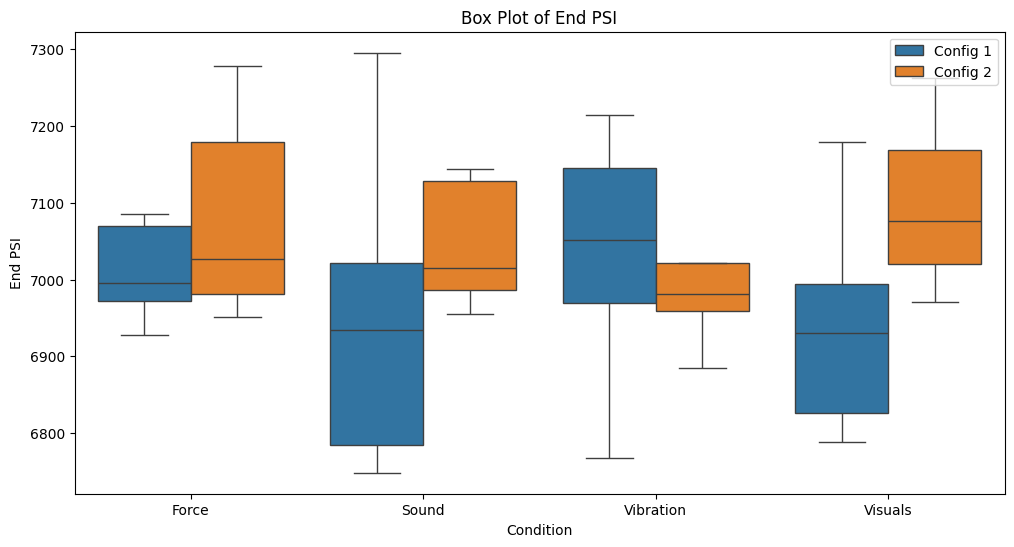

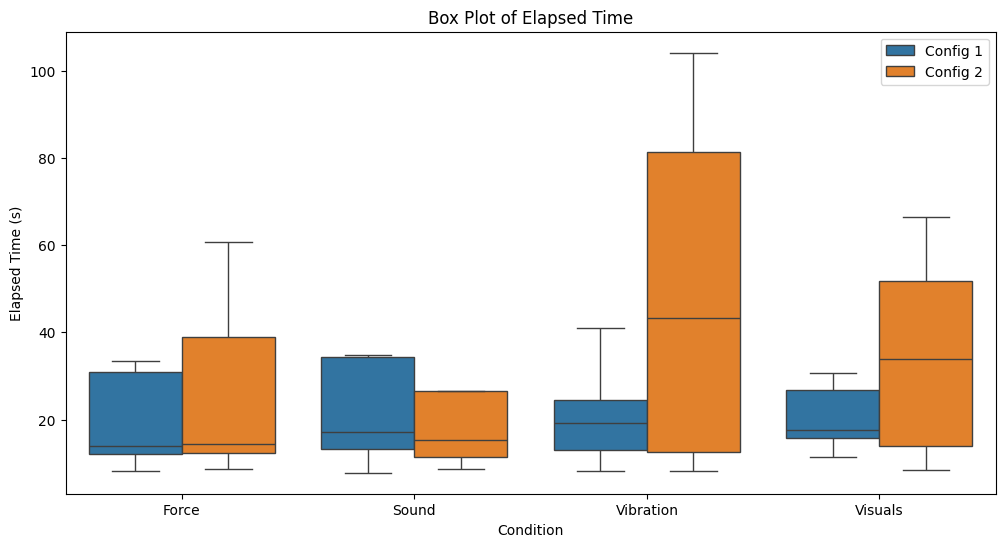

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to create box plots without individual data points or mean markers
def plot_box_without_points(data, y, title):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Condition', y=y, hue='Configuration', data=data, showmeans=False, showfliers = False)
    plt.title(title)
    plt.legend(loc='upper right')
    plt.show()

# Prepare data for elapsed time in seconds
force_config1['Elapsed Time (s)'] = pd.to_timedelta(force_config1['Elapsed Time']).dt.total_seconds()
force_config2['Elapsed Time (s)'] = pd.to_timedelta(force_config2['Elapsed Time']).dt.total_seconds()
sound_config1['Elapsed Time (s)'] = pd.to_timedelta(sound_config1['Elapsed Time']).dt.total_seconds()
sound_config2['Elapsed Time (s)'] = pd.to_timedelta(sound_config2['Elapsed Time']).dt.total_seconds()
vibration_config1['Elapsed Time (s)'] = pd.to_timedelta(vibration_config1['Elapsed Time']).dt.total_seconds()
vibration_config2['Elapsed Time (s)'] = pd.to_timedelta(vibration_config2['Elapsed Time']).dt.total_seconds()
visuals_config1['Elapsed Time (s)'] = pd.to_timedelta(visuals_config1['Elapsed Time']).dt.total_seconds()
visuals_config2['Elapsed Time (s)'] = pd.to_timedelta(visuals_config2['Elapsed Time']).dt.total_seconds()

# Add a configuration label to each DataFrame
force_config1['Configuration'] = 'Config 1'
force_config2['Configuration'] = 'Config 2'
sound_config1['Configuration'] = 'Config 1'
sound_config2['Configuration'] = 'Config 2'
vibration_config1['Configuration'] = 'Config 1'
vibration_config2['Configuration'] = 'Config 2'
visuals_config1['Configuration'] = 'Config 1'
visuals_config2['Configuration'] = 'Config 2'

# Add a condition column
force_config1['Condition'] = 'Force'
force_config2['Condition'] = 'Force'
sound_config1['Condition'] = 'Sound'
sound_config2['Condition'] = 'Sound'
vibration_config1['Condition'] = 'Vibration'
vibration_config2['Condition'] = 'Vibration'
visuals_config1['Condition'] = 'Visuals'
visuals_config2['Condition'] = 'Visuals'

# Combine all data into a single DataFrame
combined_data = pd.concat([force_config1, force_config2, sound_config1, sound_config2, vibration_config1, vibration_config2, visuals_config1, visuals_config2])

# Plotting combined configurations for End PSI and Elapsed Time separately without individual data points or mean markers
plot_box_without_points(combined_data, 'End PSI', 'Box Plot of End PSI')
plot_box_without_points(combined_data, 'Elapsed Time (s)', 'Box Plot of Elapsed Time')


In [45]:

def filter_overshoots(data, threshold=7000):
    return data[data['End PSI'] <= threshold]

# Apply the filter to the combined data
filtered_combined_data = filter_overshoots(combined_data)

# Display the filtered data
print(filtered_combined_data)

             Start Time             End Time    Elapsed Time      End PSI  \
1   2024-05-16 15:24:04  2024-05-16 15:24:38  0:00:33.394993  6966.542751   
3   2024-05-16 15:59:45  2024-05-16 16:00:11  0:00:25.893659  6999.804344   
6   2024-05-16 16:42:25  2024-05-16 16:42:37  0:00:12.014523  6991.586774   
7   2024-05-16 17:03:35  2024-05-16 17:04:07  0:00:32.727119  6928.194091   
8   2024-05-16 17:16:18  2024-05-16 17:16:31  0:00:12.835199  6987.282332   
9   2024-05-16 18:43:08  2024-05-16 18:44:25  0:01:17.246403  6386.617100   
4   2024-05-16 16:17:22  2024-05-16 16:17:34  0:00:12.518251  6951.672862   
5   2024-05-16 16:29:22  2024-05-16 16:29:31  0:00:08.719079  6486.010565   
7   2024-05-16 17:04:16  2024-05-16 17:05:12  0:00:55.550295  6977.108198   
8   2024-05-16 17:16:39  2024-05-16 17:16:54  0:00:15.617924  6993.934651   
1   2024-05-16 15:18:44  2024-05-16 15:19:19  0:00:34.876011  6817.061240   
2   2024-05-16 15:42:02  2024-05-16 15:43:32  0:01:30.210637  6774.016826   

In [46]:
# Perform ANOVA
model = ols('Q("End PSI") ~ C(Condition)', data=filtered_combined_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print(anova_table)

                    sum_sq    df         F   PR(>F)
C(Condition)  7.638840e+04   3.0  0.343238  0.79419
Residual      2.744808e+06  37.0       NaN      NaN


                    sum_sq    df         F    PR(>F)
C(Condition)   2290.210099   3.0  0.790236  0.507102
Residual      35743.665043  37.0       NaN       NaN


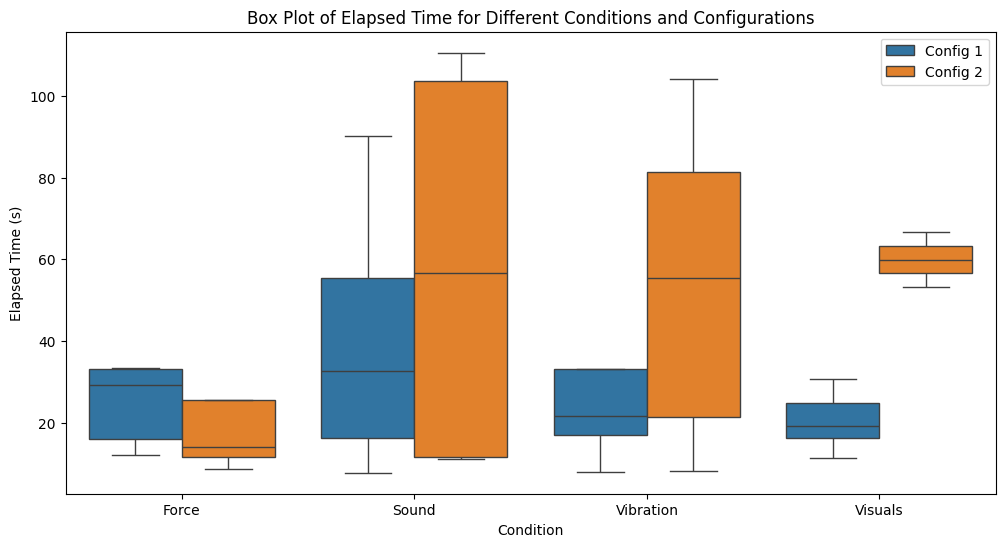

In [51]:
# Perform ANOVA on Elapsed Time
model_time = ols('Q("Elapsed Time (s)") ~ C(Condition)', data=filtered_combined_data).fit()
anova_table_time = sm.stats.anova_lm(model_time, typ=2)

# Display the ANOVA table for Elapsed Time
print(anova_table_time)

# Function to create box plots without individual data points or mean markers
def plot_box_without_points(data, y, title):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Condition', y=y, hue='Configuration', data=data, showmeans=False,showfliers = False)
    plt.title(title)
    plt.legend(loc='upper right')
    plt.show()

# Plotting combined configurations for Elapsed Time without individual data points or mean markers
plot_box_without_points(filtered_combined_data, 'Elapsed Time (s)', 'Box Plot of Elapsed Time for Different Conditions and Configurations')

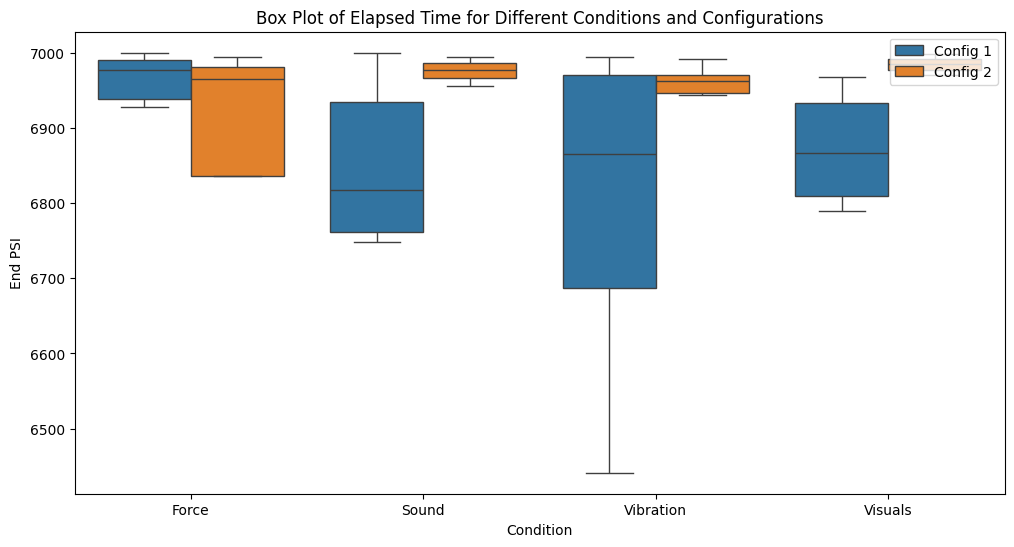

In [49]:
plot_box_without_points(filtered_combined_data, 'End PSI', 'Box Plot of Elapsed Time for Different Conditions and Configurations')

In [60]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load the data
force_config1 = pd.read_csv('force_config1.csv')
force_config2 = pd.read_csv('force_config2.csv')
sound_config1 = pd.read_csv('sound_config1.csv')
sound_config2 = pd.read_csv('sound_config2.csv')
vibration_config1 = pd.read_csv('vibration_config1.csv')
vibration_config2 = pd.read_csv('vibration_config2.csv')
visuals_config1 = pd.read_csv('visuals_config1.csv')
visuals_config2 = pd.read_csv('visuals_config2.csv')

# Add configuration and condition labels
def label_data(df, config, condition):
    df['Configuration'] = config
    df['Condition'] = condition
    return df

force_config1 = label_data(force_config1, 'Config 1', 'Force')
force_config2 = label_data(force_config2, 'Config 2', 'Force')
sound_config1 = label_data(sound_config1, 'Config 1', 'Sound')
sound_config2 = label_data(sound_config2, 'Config 2', 'Sound')
vibration_config1 = label_data(vibration_config1, 'Config 1', 'Vibration')
vibration_config2 = label_data(vibration_config2, 'Config 2', 'Vibration')
visuals_config1 = label_data(visuals_config1, 'Config 1', 'Visuals')
visuals_config2 = label_data(visuals_config2, 'Config 2', 'Visuals')

# Combine data for each condition
combined_data = pd.concat([force_config1, force_config2, sound_config1, sound_config2, vibration_config1, vibration_config2, visuals_config1, visuals_config2])

# Rename columns to remove spaces
combined_data.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)

# Function to perform two-way ANOVA and save results to CSV
def two_way_anova(data, condition):
    # Ensure there are no NaN values in the data
    data = data.dropna(subset=['End_PSI', 'Configuration', 'Condition'])
    
    # Check the unique values for Configuration and Condition
    unique_configs = data['Configuration'].unique()
    unique_conditions = data['Condition'].unique()
    
    print(f"Unique configurations for {condition}: {unique_configs}")
    print(f"Unique conditions for {condition}: {unique_conditions}")
    
    # Proceed only if there are at least two configurations and one condition
    if len(unique_configs) < 2 or len(unique_conditions) < 1:
        print(f"Not enough data for performing ANOVA on {condition}. Skipping this condition.")
        return
    
    formula = 'End_PSI ~ C(Configuration)'
    model = ols(formula, data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    output_file = f"anova_results_{condition.lower()}.csv"
    anova_table.to_csv(output_file)
    print(f"ANOVA results for {condition} saved to {output_file}")

# Perform ANOVA for each condition
conditions = ['Force', 'Sound', 'Vibration', 'Visuals']
for condition in conditions:
    condition_data = combined_data[combined_data['Condition'] == condition]
    two_way_anova(condition_data, condition)


Unique configurations for Force: ['Config 1' 'Config 2']
Unique conditions for Force: ['Force']
ANOVA results for Force saved to anova_results_force.csv
Unique configurations for Sound: ['Config 1' 'Config 2']
Unique conditions for Sound: ['Sound']
ANOVA results for Sound saved to anova_results_sound.csv
Unique configurations for Vibration: ['Config 1' 'Config 2']
Unique conditions for Vibration: ['Vibration']
ANOVA results for Vibration saved to anova_results_vibration.csv
Unique configurations for Visuals: ['Config 1' 'Config 2']
Unique conditions for Visuals: ['Visuals']
ANOVA results for Visuals saved to anova_results_visuals.csv


In [63]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load the data
force_config1 = pd.read_csv('force_config1.csv')
force_config2 = pd.read_csv('force_config2.csv')
sound_config1 = pd.read_csv('sound_config1.csv')
sound_config2 = pd.read_csv('sound_config2.csv')
vibration_config1 = pd.read_csv('vibration_config1.csv')
vibration_config2 = pd.read_csv('vibration_config2.csv')
visuals_config1 = pd.read_csv('visuals_config1.csv')
visuals_config2 = pd.read_csv('visuals_config2.csv')

# Add configuration and condition labels
def label_data(df, config, condition):
    df['Configuration'] = config
    df['Condition'] = condition
    return df

force_config1 = label_data(force_config1, 'Config 1', 'Force')
force_config2 = label_data(force_config2, 'Config 2', 'Force')
sound_config1 = label_data(sound_config1, 'Config 1', 'Sound')
sound_config2 = label_data(sound_config2, 'Config 2', 'Sound')
vibration_config1 = label_data(vibration_config1, 'Config 1', 'Vibration')
vibration_config2 = label_data(vibration_config2, 'Config 2', 'Vibration')
visuals_config1 = label_data(visuals_config1, 'Config 1', 'Visuals')
visuals_config2 = label_data(visuals_config2, 'Config 2', 'Visuals')

# Combine data for each condition
combined_data = pd.concat([force_config1, force_config2, sound_config1, sound_config2, vibration_config1, vibration_config2, visuals_config1, visuals_config2])

# Rename columns to remove spaces
combined_data.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)

# Ensure there are no NaN values in the data
combined_data = combined_data.dropna(subset=['End_PSI', 'Configuration', 'Condition'])

# Perform two-way ANOVA and save results to CSV
def two_way_anova(data):
    formula = 'End_PSI ~ C(Configuration) + C(Condition) + C(Configuration):C(Condition)'
    model = ols(formula, data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    output_file = "anova_results.csv"
    anova_table.to_csv(output_file)
    print(f"ANOVA results saved to {output_file}")

# Perform ANOVA on the combined data
two_way_anova(combined_data)

print(anova_table)


ANOVA results saved to anova_results.csv
                    sum_sq    df         F   PR(>F)
C(Condition)  7.638840e+04   3.0  0.343238  0.79419
Residual      2.744808e+06  37.0       NaN      NaN


In [64]:
import pandas as pd

# Load the ANOVA results from the provided CSV file
anova_results = pd.read_csv('anova_results.csv')
print(anova_results)


                      Unnamed: 0        sum_sq    df         F    PR(>F)
0               C(Configuration)  6.674335e+05   1.0  7.726361  0.006917
1                   C(Condition)  1.186550e+05   3.0  0.457859  0.712566
2  C(Configuration):C(Condition)  1.430753e+05   3.0  0.552091  0.648355
3                       Residual  6.306027e+06  73.0       NaN       NaN


In [70]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load the data
force_config1 = pd.read_csv('force_config1.csv')
force_config2 = pd.read_csv('force_config2.csv')
sound_config1 = pd.read_csv('sound_config1.csv')
sound_config2 = pd.read_csv('sound_config2.csv')
vibration_config1 = pd.read_csv('vibration_config1.csv')
vibration_config2 = pd.read_csv('vibration_config2.csv')
visuals_config1 = pd.read_csv('visuals_config1.csv')
visuals_config2 = pd.read_csv('visuals_config2.csv')

# Add configuration and condition labels
def label_data(df, config, condition):
    df['Configuration'] = config
    df['Condition'] = condition
    return df

force_config1 = label_data(force_config1, 'Config 1', 'Force')
force_config2 = label_data(force_config2, 'Config 2', 'Force')
sound_config1 = label_data(sound_config1, 'Config 1', 'Sound')
sound_config2 = label_data(sound_config2, 'Config 2', 'Sound')
vibration_config1 = label_data(vibration_config1, 'Config 1', 'Vibration')
vibration_config2 = label_data(vibration_config2, 'Config 2', 'Vibration')
visuals_config1 = label_data(visuals_config1, 'Config 1', 'Visuals')
visuals_config2 = label_data(visuals_config2, 'Config 2', 'Visuals')

# Combine data for each condition
combined_data = pd.concat([force_config1, force_config2, sound_config1, sound_config2, vibration_config1, vibration_config2, visuals_config1, visuals_config2])

# Rename columns to remove spaces and special characters
combined_data.rename(columns=lambda x: x.replace(' ', '_').replace('%', 'pct'), inplace=True)

# Debug: Check if the column renaming worked
print(combined_data.columns)

# Ensure there are no NaN values in the data
combined_data = combined_data.dropna(subset=['Extension_pct', 'Configuration', 'Condition'])

# Debug: Check if the Extension_pct column is numeric
print(combined_data['Extension_pct'].dtype)

# Ensure the Extension_pct column is numeric
combined_data['Extension_pct'] = pd.to_numeric(combined_data['Extension_pct'], errors='coerce')

# Perform two-way ANOVA and save results to CSV
def two_way_anova(data):
    formula = 'Extension_pct ~ C(Configuration) + C(Condition) + C(Configuration):C(Condition)'
    model = ols(formula, data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    output_file = "anova_results_extension.csv"
    anova_table.to_csv(output_file)
    print(f"ANOVA results saved to {output_file}")
    return anova_table

# Perform ANOVA on the combined data
anova_results = two_way_anova(combined_data)

# Display the ANOVA results in the terminal
print("\nANOVA Results:\n")
print(anova_results)

# Optionally, print the contents of the CSV file to ensure it was saved correctly
print("\nContents of anova_results_extension.csv:\n")
print(pd.read_csv("anova_results_extension.csv"))


Index(['Start_Time', 'End_Time', 'Elapsed_Time', 'End_PSI', 'Extension_pct',
       'Configuration', 'Condition'],
      dtype='object')
object


ValueError: zero-size array to reduction operation maximum which has no identity